# Analysis of The Customer Retention Strategy
# Contents <a id='back'></a>

1. Introduction
    
    
2. Data Pra-processing
    * Loading Data
    * Preliminary Exploratory Data
    * Fixing Column Names
    * Checking Data Quality
    * Checking Missing Values
    * Checking Data Duplicate
    * Initial Conclusion
   

3. Exploratory Data Analysis (EDA)


4. Machine Learning
    * Build a Model to Predict User Churn
    * Create User Clusters


5. Overall Conclusion

## Introduction

- The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn.

- In order to fight churn, Model Fitness has digitized a number of its customer profiles. We have to analyze them and come up with a customer retention strategy. 

- Our objectives are as follows:
    - Learn to predict the probability of churn (for the upcoming month) for each customer
    - Draw up typical user portraits: select the most outstanding groups and describe their main features
    - Analyze the factors that impact churn most
    - Draw basic conclusions and develop recommendations on how to improve customer service:
        - Identify target groups
        - Suggest measures to cut churn
        - Describe any other patterns you see with respect to interaction with customers


## Data Pra-processing <a id='intro'></a>
### Loading Data

In [1]:
# Load the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', 300)

In [2]:
# Loading data files into DataFrames
# Optimize the data for analysis purposes, type column object converted into category

df = pd.read_csv('gym_churn_us.csv')

The dataset includes the following fields:

- `'Churn'` — the fact of churn for the month in question


- Current dataset fields:
    - User data for the preceding month
        - `'gender'`
        - `'Near_Location'` — whether the user lives or works in the neighborhood where the gym is located
        - `'Partner'` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
        - `Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
        - `'Phone'` — whether the user provided their phone number
        - `'Age'`
        - `'Lifetime'` — the time (in months) since the customer first came to the gym
        
        
        
- Data from the log of visits and purchases and data on current membership status
    - `'Contract_period'` — 1 month, 3 months, 6 months, or 1 year
    - `'Month_to_end_contract'` — the months remaining until the contract expires
    - `'Group_visits'` — whether the user takes part in group sessions
    - `'Avg_class_frequency_total'` — average frequency of visits per week over the customer's lifetime
    - `'Avg_class_frequency_current_month'` — average frequency of visits per week over the preceding month
    - `'Avg_additional_charges_total'` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

**Conclusions**

Each row in the table is customer profiles and membership data. 2 columns are describe the customer profiles: Gender, Age. While, 12 columns are the information related to the gym's membership: Near_Location, Partner, Promo_friends, Phone, Contract_period, Group_visits, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month, Churn. 

It is clear that the data we have is sufficient for us to conduct churn analysis and come up with a customer retention strategy.

To continue the analysis, we need to do data pre-processing first.

### Preliminary Exploratory Data

In [3]:
# Show the shape of DataFrame

df.shape

(4000, 14)

In [4]:
# Show the info of DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# Show the data distribution of DataFrame

df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.48675000000000,0.308500000000000,0.903500000000000,4.68125000000000,0.412250000000000,29.184249999999999,146.943727809250021,4.322750000000000,3.724750000000000,1.879019712534937,1.767051822040508,0.265250000000000
std,0.499957425044087,0.361711412989101,0.49988689643489,0.461931916275352,0.295312634995689,4.54970585789327,0.492301256987942,3.258367102790006,96.355602395679838,4.191297434094276,3.749266820049219,0.972244872030617,1.052905717489531,0.441521429596796
min,0.000000000000000,0.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,1.00000000000000,0.000000000000000,18.000000000000000,0.148204788456624,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,27.000000000000000,68.868829978416670,1.000000000000000,1.000000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,29.000000000000000,136.220158971036881,1.000000000000000,3.000000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,6.00000000000000,1.000000000000000,31.000000000000000,210.949624655502134,6.000000000000000,5.000000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,12.00000000000000,1.000000000000000,41.000000000000000,552.590740386879816,12.000000000000000,31.000000000000000,6.023668475995910,6.146782880452392,1.000000000000000


### Fixing Column Names

In [6]:
# Change all column names to lower case

df.columns = df.columns.str.lower()

In [7]:
# Look back into the table after fixing the column names

df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470422861144,5.0,3,0.020397947620858,0.000000000000000,0
1,0,1,0,0,1,12,1,31,113.202937651058207,12.0,7,1.922936055041820,1.910243521519641,0
2,0,1,1,0,1,1,0,28,129.448479332006144,1.0,2,1.859098347383238,1.736501891634414,0
3,0,1,1,1,1,12,1,33,62.669863191238292,12.0,2,3.205632768238500,3.357214513052662,0
4,1,1,1,1,1,1,0,26,198.362265439036833,1.0,3,1.113884400425780,1.120078107422207,0


### Checking Data Quality

In [8]:
# Check the data quality of the target variable = churn column

df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [9]:
# Check the difference of percentage of the target variable = churn column

df['churn'].value_counts() / df.shape[0] * 100

0    73.474999999999994
1    26.524999999999999
Name: churn, dtype: float64

In [10]:
# Check the data quality of the gender column

df['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

In [11]:
# Check the data quality of the near_location column

df['near_location'].value_counts()

1    3381
0     619
Name: near_location, dtype: int64

In [12]:
# Check the data quality of the partner column

df['partner'].value_counts()

0    2053
1    1947
Name: partner, dtype: int64

In [13]:
# Check the data quality of the promo_friends column

df['promo_friends'].value_counts()

0    2766
1    1234
Name: promo_friends, dtype: int64

In [14]:
# Check the data quality of the phone column

df['phone'].value_counts()

1    3614
0     386
Name: phone, dtype: int64

In [15]:
# Check the data quality of the contract_period column

df['contract_period'].value_counts()

1     2207
12     960
6      833
Name: contract_period, dtype: int64

In [16]:
# Check the data quality of the group_visits column

df['group_visits'].value_counts()

0    2351
1    1649
Name: group_visits, dtype: int64

In [17]:
# Check the data quality of the age column

df['age'].value_counts()

29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: age, dtype: int64

In [18]:
# Check the data quality of the avg_additional_charges_total column

df['avg_additional_charges_total'].value_counts()

14.227470422861144     1
17.082320645286465     1
278.204461378998644    1
120.457630622340702    1
130.711299492831984    1
                      ..
92.329634965850701     1
147.615388356373018    1
24.923560815950200     1
56.129880283934938     1
178.861813612650536    1
Name: avg_additional_charges_total, Length: 4000, dtype: int64

In [19]:
# Check the data quality of the month_to_end_contract column

df['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

In [20]:
# Check the data quality of the lifetime column

df['lifetime'].value_counts()

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
20      7
19      7
18      7
21      5
23      2
24      2
26      2
22      2
31      1
27      1
29      1
Name: lifetime, dtype: int64

In [21]:
# Check the data quality of the avg_class_frequency_total column

df['avg_class_frequency_total'].value_counts()

0.000000000000000    88
0.020397947620858     1
2.182034158627605     1
1.976985223642932     1
1.671952352210304     1
                     ..
0.999179053486076     1
1.734371063682097     1
1.783444312685005     1
3.791391402232589     1
1.101832211387191     1
Name: avg_class_frequency_total, Length: 3913, dtype: int64

In [22]:
# Check the data quality of the avg_class_frequency_current_month column

df['avg_class_frequency_current_month'].value_counts()

0.000000000000000    181
1.328133513026170      1
2.628931805937115      1
1.797684282341875      1
1.524367165178005      1
                    ... 
2.359230814691504      1
2.461782357671307      1
0.671450193548776      1
1.047047141915660      1
1.035269756471311      1
Name: avg_class_frequency_current_month, Length: 3820, dtype: int64

### Checking Missing Values


In [23]:
# Check missing values

df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

</div>

### Checking Data Duplicate

In [24]:
# Checks for duplicate data

df.duplicated().sum()

0

### Initial Conclusion

* Our datasets amounted **4000** rows and **14** columns.
* We change all column names to lower case to make analysis easier.
* There is no missing values and duplicate data.
* The target variable of `'churn'` column is unbalanced which 2939 (73.47%) customers have stayed while 1061 (26.53%) customers have left.

## Exploratory Data Analysis (EDA)

### Does it contain any missing features?
- Study the mean values and standard deviation

In [25]:
# Check missing values

df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [26]:
# Look at the mean values and standard deviation of the data

df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.00000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000,4000.000000000000000
mean,0.510250000000000,0.845250000000000,0.48675000000000,0.308500000000000,0.903500000000000,4.68125000000000,0.412250000000000,29.184249999999999,146.943727809250021,4.322750000000000,3.724750000000000,1.879019712534937,1.767051822040508,0.265250000000000
std,0.499957425044087,0.361711412989101,0.49988689643489,0.461931916275352,0.295312634995689,4.54970585789327,0.492301256987942,3.258367102790006,96.355602395679838,4.191297434094276,3.749266820049219,0.972244872030617,1.052905717489531,0.441521429596796
min,0.000000000000000,0.000000000000000,0.00000000000000,0.000000000000000,0.000000000000000,1.00000000000000,0.000000000000000,18.000000000000000,0.148204788456624,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,27.000000000000000,68.868829978416670,1.000000000000000,1.000000000000000,1.180875086219582,0.963002948193214,0.000000000000000
50%,1.000000000000000,1.000000000000000,0.00000000000000,0.000000000000000,1.000000000000000,1.00000000000000,0.000000000000000,29.000000000000000,136.220158971036881,1.000000000000000,3.000000000000000,1.832768412113406,1.719574310109868,0.000000000000000
75%,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,6.00000000000000,1.000000000000000,31.000000000000000,210.949624655502134,6.000000000000000,5.000000000000000,2.536078338329289,2.510336265936281,1.000000000000000
max,1.000000000000000,1.000000000000000,1.00000000000000,1.000000000000000,1.000000000000000,12.00000000000000,1.000000000000000,41.000000000000000,552.590740386879816,12.000000000000000,31.000000000000000,6.023668475995910,6.146782880452392,1.000000000000000


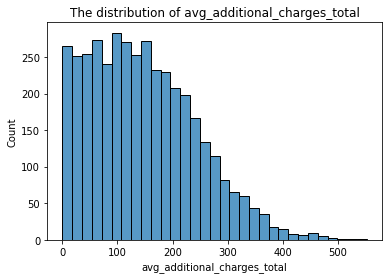

In [27]:
# Plot of feature of avg_additional_charges_total

sns.histplot(df['avg_additional_charges_total'])
plt.title('The distribution of avg_additional_charges_total');

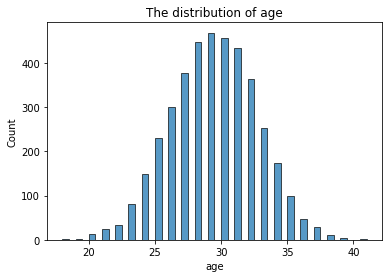

In [28]:
# Plot of feature of age

sns.histplot(df['age'])
plt.title('The distribution of age');

**Conclusions:**
- There is no missing values.
- The data distribution of each features mostly are normal, since many features are binary (1/0).
- Features of `'avg_additional_charges_total'` has a positive skew because the distance between with the mean values and standard deviation, respectively 146.943 vs. 96.35 (first plot above).
- While features `'age'` has a normal distribution which the mean values and the standard deviation are 29.184 vs. 3.2 5 (second plot above).


### The mean feature values in two groups: for those who left (churn) and for those who stayed

In [29]:
# Grouping churn column to see the mean values

df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037427696495,0.873086083701939,0.534195304525349,0.353521605988431,0.903708744470908,5.747192922762845,0.464103436543042,29.976522626743790,158.445714801611530,5.283089486219803,4.711806736985369,2.024875642518551,2.027881733095180
1,0.510838831291235,0.768143261074458,0.355325164938737,0.183788878416588,0.902921771913289,1.728557964184731,0.268614514608860,26.989632422243165,115.082898619287278,1.662582469368520,0.990574929311970,1.474994662372975,1.044545593398017


**Conclusions:**
- The mean feature values such as `'contract_period`', `'month_to_end_contract'`, `'lifetime'`, and `'avg_additional_charges_total'` for those who stayed are high than those who left (5.74 vs. 1.72, 5.28 vs. 1.66, 4.71 vs. 0.90, and 158.44 vs. 115.08 respectively).
- This means, the customer with the highest no of months remaining until the contract expires will have a high possibility to stay than those who have one month left until the contract expires.


### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.


In [30]:
# Define a formula for visualization

def feat_hist (x, group_col, key_cols):
    x_new = x.copy ()
    x_new[key_cols] = df [key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new [group_col]==cl][c],
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

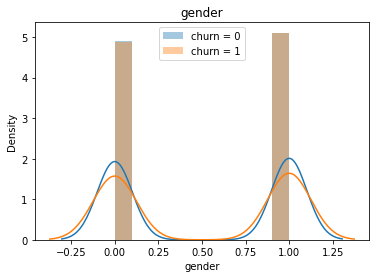

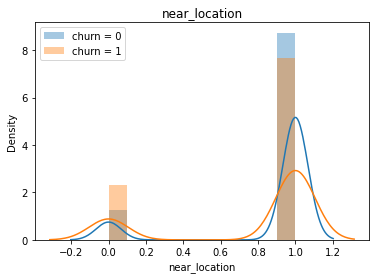

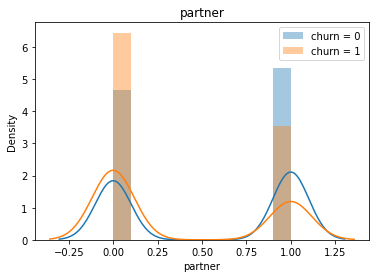

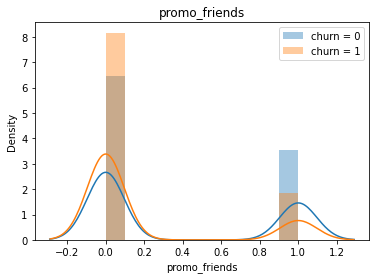

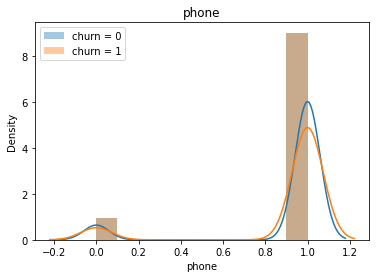

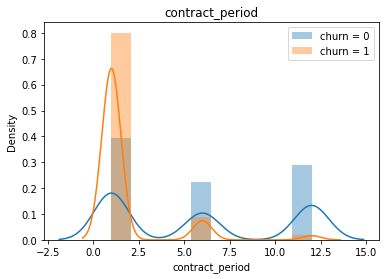

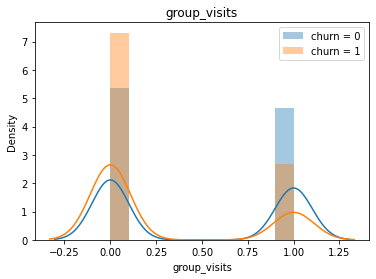

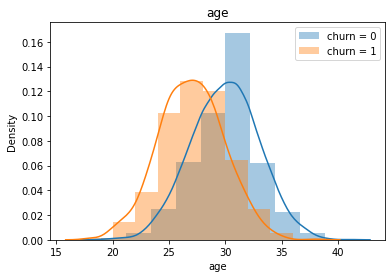

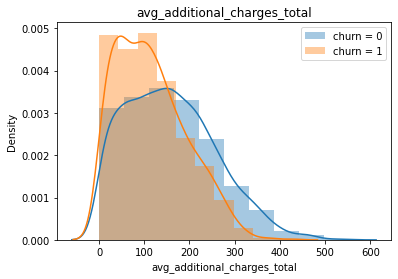

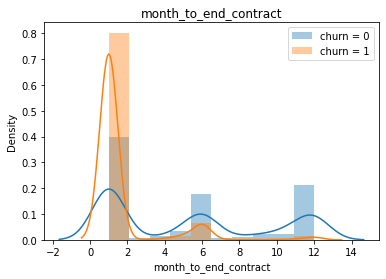

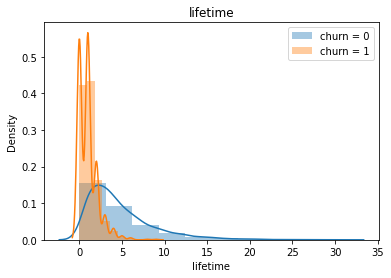

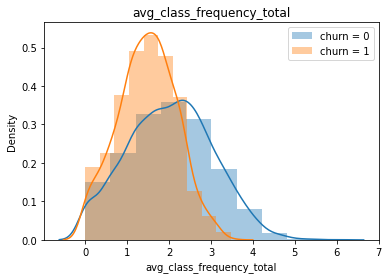

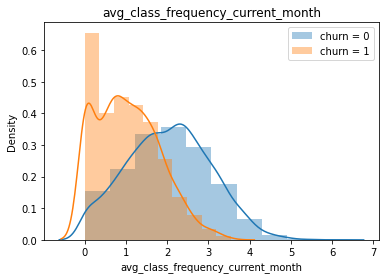

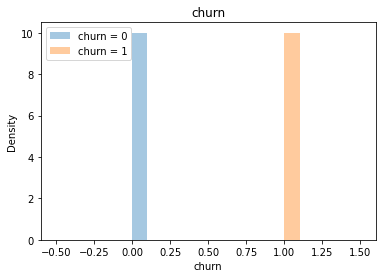

In [31]:
# Visualization of the distribution of churn and stay

feat_hist(df, 'churn', df.columns)

**Conclusions:**
- Features of `'gender'`, `'near_location`', `'partner`', `'promo_friends'`, `'phone'`, `'group_visits'`, `'age'`, `'avg_class_frequency_current_month'` are not take affect the churn customer, because the curve picture the same between churn and not churn.
- Furthermore, the curve of `'contract_period`', `'month_to_end_contract'`, `'lifetime'`, `'avg_additional_charges_total'` and `'avg_class_frequency_total'` features show a significant difference between churn and not churn. The lowest the number, the highest customers will churn.


### Build a correlation matrix and display it.

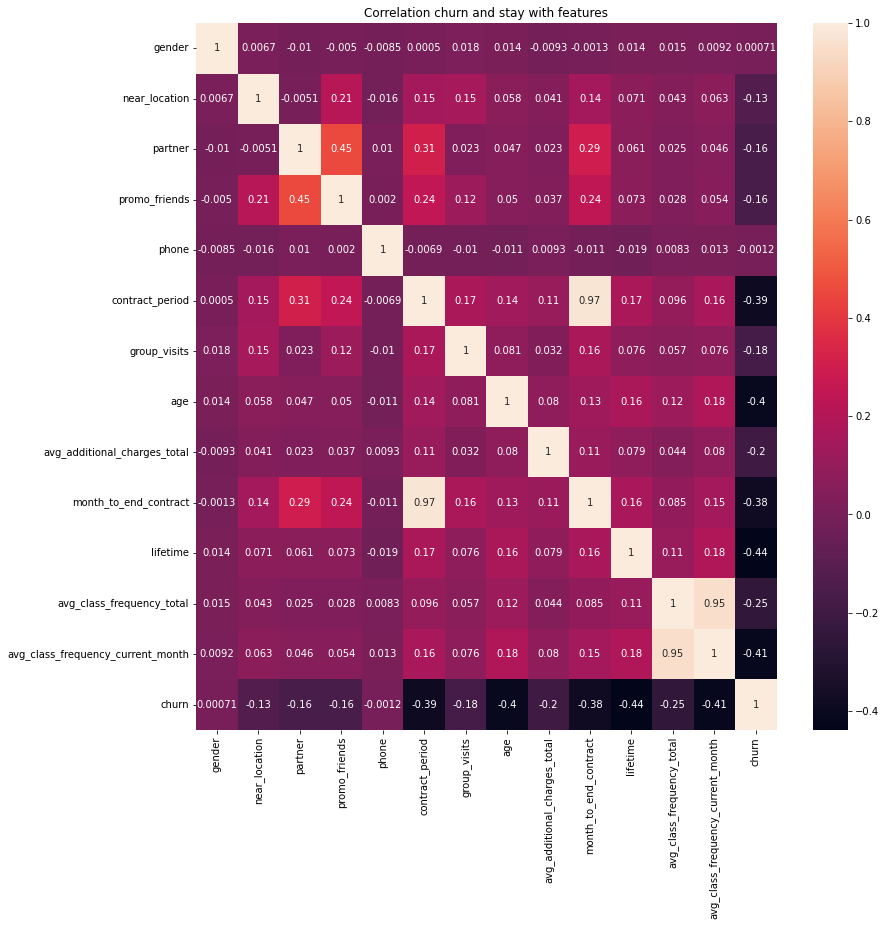

In [32]:
# Correlation matrix

plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation churn and stay with features')
plt.show()

In [33]:
# Correlation churn with features

df.corr()['churn']

gender                               0.000707733985153
near_location                       -0.128097990299810
partner                             -0.157985736985098
promo_friends                       -0.162233077833515
phone                               -0.001176601362480
contract_period                     -0.389984211586078
group_visits                        -0.175324655498149
age                                 -0.404735252823589
avg_additional_charges_total        -0.198697451068203
month_to_end_contract               -0.381392983695714
lifetime                            -0.438219968447980
avg_class_frequency_total           -0.249715111332895
avg_class_frequency_current_month   -0.412348390707265
churn                                1.000000000000000
Name: churn, dtype: float64

**Conclusions:**


From the correlation matrix, we can say that all features have a negative relationship with churn. Then, we can assume that the lowest the lifetime value since the customer first came to the gym, the highest possibility of customers will churn.

## Machine Learning

### Build a Model to Predict User Churn

We will build a binary classification model for customers where the target feature is the user's leaving next month.



#### Divide the data into train and validation sets

In [34]:
# Divide the data into train and validation sets

X = df.drop(columns = ['churn'])
y = df['churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2022)

In [35]:
# Look at the shape of train and validation sets

X_train.shape, X_val.shape

((3200, 13), (800, 13))

In [36]:
# Look at the head data of train

X_train.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
3167,1,0,1,0,1,6,0,30,297.189815590227909,5.0,4,1.778190214401583,1.774899887952960
2001,1,1,1,1,1,1,0,27,265.053085156232896,1.0,1,1.006895629705532,0.000000000000000
3933,1,1,0,0,1,6,1,28,49.939368538110131,6.0,5,1.410445938331867,1.302023016834531
1952,0,1,0,0,1,6,0,31,46.971990251828288,4.0,2,1.254543490504631,1.312805586466222
1534,0,1,1,1,1,12,1,26,42.542070469049492,7.0,6,2.195334463459245,2.261025131302764


**Conclusions:**

- The target value (X) is `'churn'` and the rest are the features (Y).
- We use train_test_split from `sklearn.model_selection` to divide the data into train and validation sets.
- We divided the data of train and validation sets with proportion of 80:20.
- We fill the random_state = 2022 so the results will be selected randomly fair and equally.
- The results train sets has 3200 observations and validation sets has 800 observations.

#### Train the model on the train set with two methods
- Logistic regression
- Random forest


##### Logistic regression

In [37]:
# Training the model on the train set with Logistic regression

lr_model = LogisticRegression(random_state=2022)

lr_model.fit(X_train, y_train)

y_proba_lr = lr_model.predict_proba(X_val)
y_pred_lr = lr_model.predict(X_val)

print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Precision score for logistic regression is: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('Recall score for logistic regression is: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

Accuracy score for logistic regression is: 0.92
Precision score for logistic regression is: 0.89
Recall score for logistic regression is: 0.83


##### Random forest

In [38]:
# Training the model on the train set with Random forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=2022)

rf_model.fit(X_train, y_train)

y_proba_rf = rf_model.predict_proba(X_val)
y_pred_rf = rf_model.predict(X_val)

print('Accuracy score for random forest is: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Precision score for random forest is: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('Recall score for random forest is: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

Accuracy score for random forest is: 0.92
Precision score for random forest is: 0.89
Recall score for random forest is: 0.83


**Conclusions:**

- We train the model on the train set with two methods:
    - logistic regression
    - random forest
- We indicate the `random_state` parameter when dividing data and defining the algorithm = 2022.
- We evaluate accuracy, precision, and recall for both models using the validation data. 
- Both the two models have given the same results which are:
    - Accuracy score: 0.93
    - Precision score: 0.90
    - Recall score: 0.84



### Create User Clusters 

#### Standardize the data

Firstly, we have to standardize the data because clusters method is unsupervised learning without "right answers".

In [39]:
# Standardize the data

sc = StandardScaler()
x_sc = sc.fit_transform(df.drop(columns='churn'))

#### Use the `linkage()` function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

In [40]:
# Build a matrix of distances based on the standardized feature matrix using linkage()

linked = linkage(x_sc, method='ward')

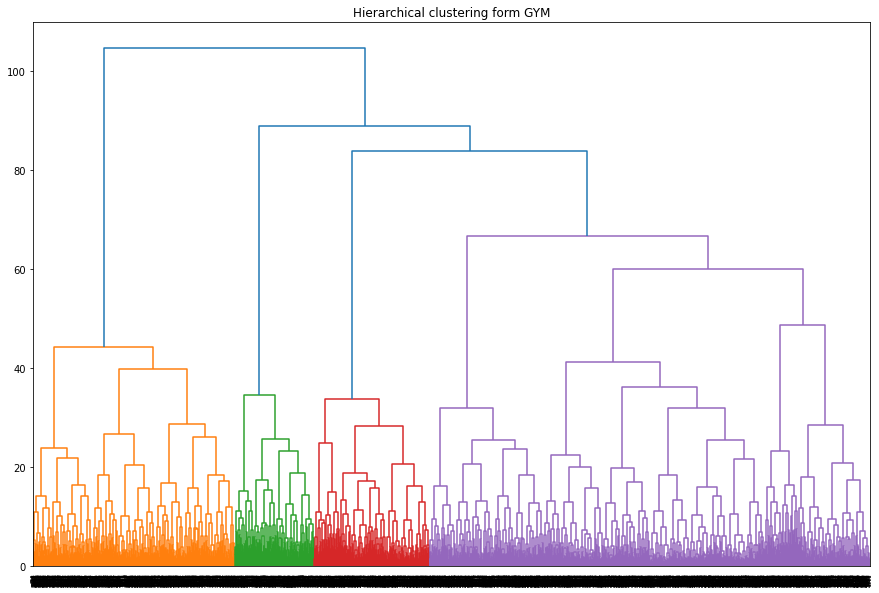

In [41]:
# Visualization

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering form GYM')
plt.show()

**Conclusions:**
- Creating user clusters with the linkage() function results that the data is being divided into four clusters, with the violet cluster as the biggest cluster.

#### Train the clustering model with the K-means algorithm and predict customer clusters. 

In [42]:
# Train clustering model with K-means algorithm

km = KMeans(n_clusters = 5)
labels = km.fit_predict(df.drop(columns=['churn']))


#### Look at the mean feature values for clusters.

- Does anything catch your eye?

In [43]:
# Create cluster labels and calculate using formula of count()

df['cluster_km'] = labels
df.groupby(['cluster_km']).count()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,962,962,962,962,962,962,962,962,962,962,962,962,962,962
1,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032
2,271,271,271,271,271,271,271,271,271,271,271,271,271,271
3,706,706,706,706,706,706,706,706,706,706,706,706,706,706
4,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029,1029


In [44]:
# Calculate each cluster using formula of sum()

df.groupby(['cluster_km']).sum()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,492,812,477,308,868,4575,407,28284,168228.254181152064120,4210.0,3607,1823.182809287428654,1717.717704591969323,218
1,525,851,504,303,937,4333,400,29834,36739.945103929247125,3979.0,3503,1895.531070383712859,1746.805329722021270,361
2,127,232,140,90,251,1578,117,8088,96606.611189195973566,1459.0,1198,547.219401855915066,544.542510836931456,12
3,368,622,361,245,634,3813,306,20717,177195.245311930950265,3531.0,2944,1343.857034042792748,1301.338252663640560,126
4,529,864,465,288,924,4426,419,29814,109004.855450791830663,4112.0,3647,1906.288534569897138,1757.803490347468141,344


In [45]:
# Calculate mean values for each cluster

df.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.511434511434511,0.844074844074844,0.495841995841996,0.320166320166320,0.902286902286902,4.755717255717256,0.423076923076923,29.401247401247403,174.873445094752668,4.376299376299376,3.749480249480249,1.895200425454707,1.785569339492692,0.226611226611227
1,0.508720930232558,0.824612403100775,0.488372093023256,0.293604651162791,0.907945736434108,4.198643410852713,0.387596899224806,28.908914728682170,35.600721999931444,3.855620155038760,3.394379844961240,1.836754913162512,1.692640823374052,0.349806201550388
2,0.468634686346863,0.856088560885609,0.516605166051661,0.332103321033210,0.926199261992620,5.822878228782288,0.431734317343173,29.845018450184501,356.481960107734210,5.383763837638377,4.420664206642066,2.019259785446181,2.009381958807865,0.044280442804428
3,0.521246458923513,0.881019830028329,0.511331444759207,0.347025495750708,0.898016997167139,5.400849858356940,0.433427762039660,29.344192634560905,250.984766730780393,5.001416430594901,4.169971671388102,1.903480218190925,1.843255315387593,0.178470254957507
4,0.514091350826045,0.839650145772595,0.451895043731778,0.279883381924198,0.897959183673469,4.301263362487853,0.407191448007775,28.973760932944607,105.932804130993034,3.996112730806608,3.544217687074830,1.852564173537315,1.708263839016004,0.334305150631681


**Conclusions:**

- Creating user clusters with the K-means algorithm results that the data is being divided into five clusters.
- Among other features, the feature value of `'avg_additional_charges_total'` has a big different value in each cluster. From here, we can assume that cluster 2 is the most spending group with an average additional charge of $356.481.

- While cluster 1 is the most economical spending with the average additional charge of $35.53.


#### Plot distributions of features for the clusters
- Do you notice anything?


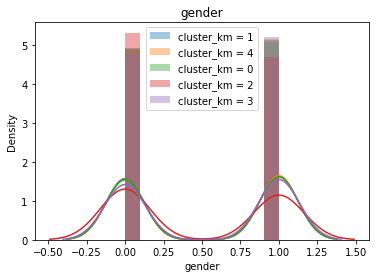

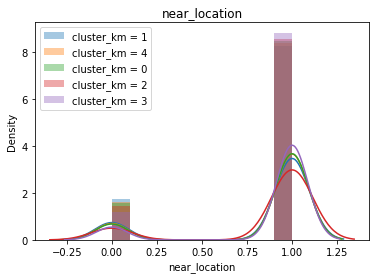

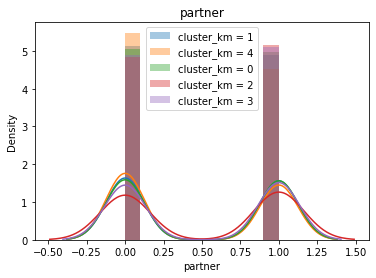

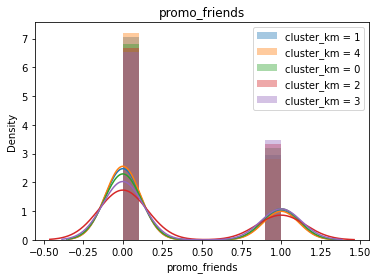

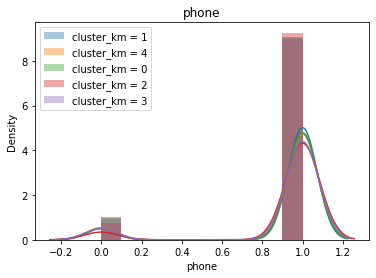

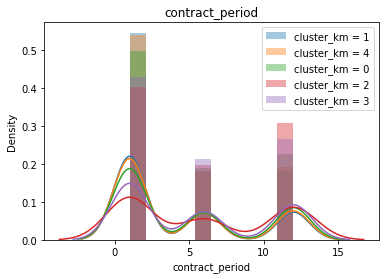

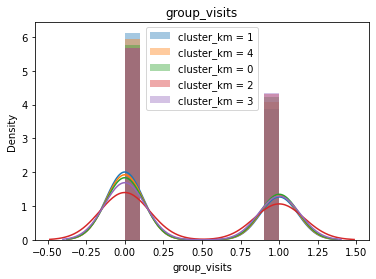

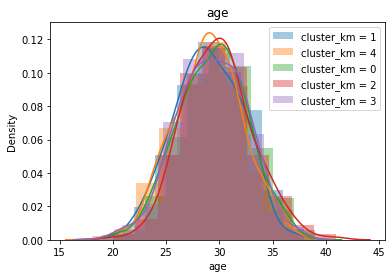

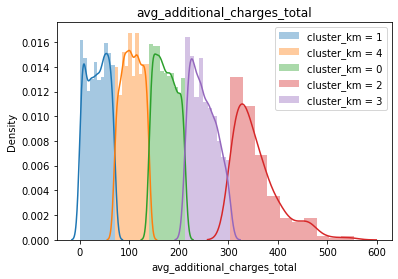

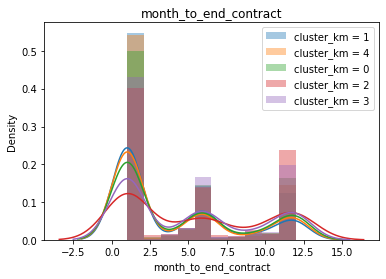

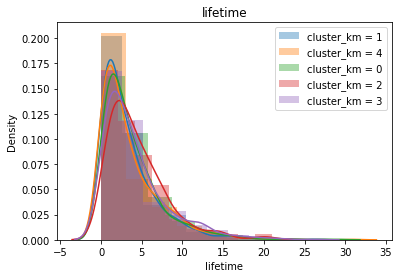

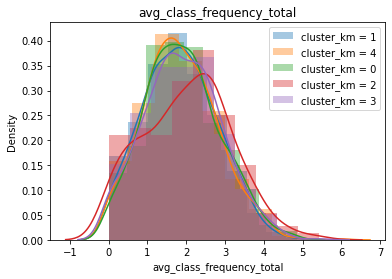

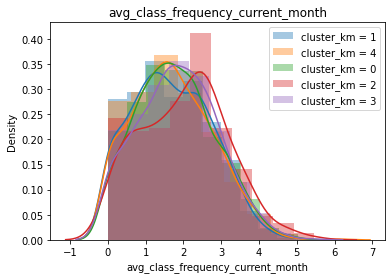

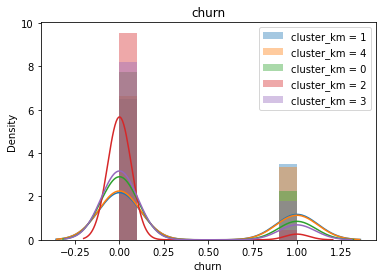

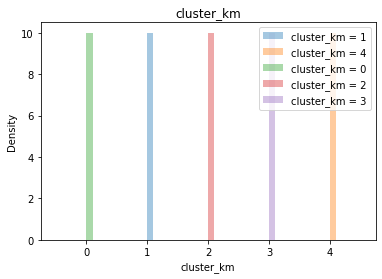

In [46]:
# Visualization of the distribution of churn and stay using K-means algorithm

feat_hist(df, 'cluster_km', df.columns)

**Conclusions:**

- Supported by the visualization above, we can see that each cluster has a different feature value of `'avg_additional_charges_total'`.
- Each curve is in a different cluster. 
- While for other feature values, it has a stacked curve in all clusters.

#### Calculate the churn rate for each cluster

- Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [47]:
# Grouping churn rate by cluster

df.groupby(['cluster_km']).mean()['churn']

cluster_km
0    0.226611226611227
1    0.349806201550388
2    0.044280442804428
3    0.178470254957507
4    0.334305150631681
Name: churn, dtype: float64

**Conclusions:**

- Cluster 2 is the royal cluster with a churn rate of 0.044 only.
- While Cluster 1 is the customers are prone to leaving (churn rate of 0.351).

## Overal Conclusion

**In the Data Pra-processing:**

* Our datasets amounted **4000** rows and **14** columns.
* We change all column names to lower case to make analysis easier.
* There is no missing values and duplicate data.
* The target variable of `'churn'` column is unbalanced which 2939 (73.47%) customers have stayed while 1061 (26.53%) customers have left.

**In the Exploratory Data Analysis (EDA) Section:**
- Using histogram, we can see that the curve of `'contract_period`', `'month_to_end_contract'`, `'lifetime'`, `'avg_additional_charges_total'` and `'avg_class_frequency_total'` features show a significant difference between churn and not churn. The lowest the number of features, the highest customers will churn.
- From the correlation matrix, all features have a negative relationship with churn. Then, we can assume that the lowest the lifetime value since the customer first came to the gym, the highest possibility of customers will churn.

**In the Machine Learning Section:**
- After train the model on the train set with two methods (logistic regression and random forest), they have given the same results which are:
    - Accuracy score: 0.93
    - Precision score: 0.90
    - Recall score: 0.84
- Clustering using K-Means, we can know that from 5 clusters, all of them has a different feature value of `'avg_additional_charges_total'`, which each curve is in a different cluster.
- Cluster 2 is the royal cluster with a churn rate of 0.044 only. While Cluster 1 is the customers are prone to leaving (churn rate of 0.351).

**Recommendations:**
- We can predict that the probability of churn (for the upcoming month) for each customer is customer with the lowest month_to_end_contract left (1 month). It's the factors that impact churn most. To reduce this probability happen, we can offer them vouchers/discounts for membership then they might still stay for the upcoming month.
- Cluster with the lowest `'avg_additional_charges_total'` (Cluster 1), we can offer them meal vouchers, so they have the potential to come to the cafe. Because based on the churn rate, we know that customers with the highest `'avg_additional_charges_total'` (Cluster 2) is the royal cluster with the lowest churn rate.